<center><h1>Robust Linear Regression</h1>
<h2><i>Practical 3</i></h2></center>

*   **Manuel Andrés Hernández Alonso**, `mhernaal70.alumnes@ub.edu`, **niub**20274855
*   **Alexandru Oarga Hategan**, `aoargaha35@alumnes.ub.edu`, **niub**21447381

# 1. Introduction

In this practical session we work on unsconstrained regression problems. In particular, we focus on error functions, measurements, and their robustness. In this first section, we will work on the well knwon least squares method.

Given a set of $m$ points in $\mathbb{R}^2$, where ${x_i, y_i}$ is the $i$-th point in the set, we are going to perform a linear regression on these set of points. To do so we will find the best fitting line $\hat{y} = w_0 x + w_1$.
In order to find the best fitting line, we need to define an error measure that is going to be minimized. In this case, the error function is given by the least squares error function:

$$
Q = \frac{1}{2} \sum_{i=1}^{m} (\hat{y} - y_i)^2
$$

Since $\hat{y}$ is given by the line we are fitting, we can define the error function as:


$$
Q = \frac{1}{2} \sum_{i=1}^{m} (w_0 x_i + w_1 - y_i)^2
$$

Given the gradient of this function, we can obtain the optimal value for $\mathbf{w} = (w_0, w_1)$ with the gradient descent method:

$$
\mathbf{w}^{k+1} = \mathbf{w}^{k} - \alpha^k \nabla Q(\mathbf{w})
$$

This is implemented in the next exercises.

**1.** *Implement the method proposed with gradient descent and backtracking (or a small constant
$\alpha$ value). You may check your method with a randomly generated set of points*

With the following code we define the functions as well as the gradient of the function:

In [1]:
import numpy as np

def LSM(y, yhat):
  return (1/2)*np.sum((yhat-y)**2)

def linear_regression(w, x):
  return w[0] * x + w[1]

def _loss(w0, w1):
  return LSM(Yi, linear_regression(np.array([w0, w1]), Xi))

def LR_grad(w0, w1):
  return np.array([np.sum((w0*Xi+w1-Yi)*Xi), np.sum((w0*Xi+w1-Yi))])

We can now write the implementation of the gradient descent algorithm:

In [2]:
def gradient_descent_backtrack(x_0, grad_fn, fn, dpath=False):
  if dpath:
    path = []
  x = np.array(x_0)
  lastfn = fn(*x)
  k = 0
  while k > -1:
    if dpath:
      path.append(x)
    a_k = 1.0
    grad = grad_fn(*x)
    temp = x - a_k * grad
    newfn = fn(*temp)

    while newfn >= lastfn:
      a_k = a_k/2
      temp = x - a_k * grad
      newfn = fn(*temp)

    if np.linalg.norm(grad_fn(*temp)) < 10e-5:
      x = temp
      if dpath:
        path.append(x)
      break
    k += 1
    lastfn = newfn
    x = temp

  if dpath:
    return x, np.array(path), k
  return x, k


In [3]:


def LSM(y, yhat):
  return (1/2)*np.sum((yhat-y)**2)

def linear_regression(w, x):
  return w[0] * x + w[1]

def fn(x, y, z):
  return np.sin(x*y) + np.exp(y+z) - z

def grad_fn(x, y, z):
  return np.array([y*np.cos(y*x), np.cos(x*y) - x*y*np.sin(x*y), np.exp(z+y)-1])

w, k = gradient_descent_backtrack([1,2,3], grad_fn, fn)
print(w)

<ipython-input-3-cf62ba3148fb>:8: RuntimeWarning: overflow encountered in exp
  return np.sin(x*y) + np.exp(y+z) - z


KeyboardInterrupt: 

In [ ]:
import math
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)

Here we can see the set of point that we will use to perform a linear regression.

(100, 2)


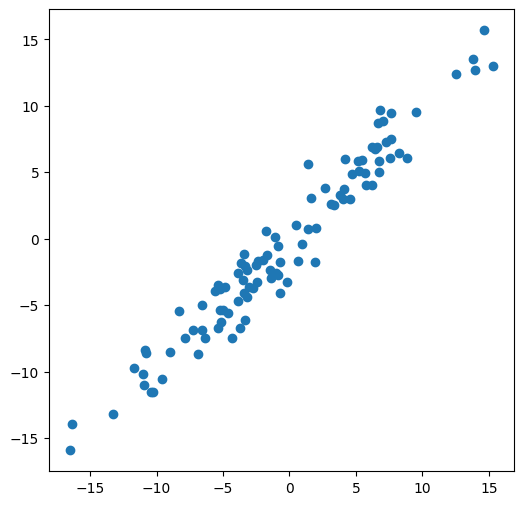

In [ ]:
import matplotlib.pyplot as plt
print(points.shape)
plt.rcParams['figure.figsize'] = [6, 6] # resize notebook plots
plt.scatter(points[:,0], points[:,1])
plt.show()

Finally, with the next lines of code we find the solution to the system with gradient descent:

In [ ]:
import random
Xi = points[:,0]
Yi = points[:,1]
weights = np.array([random.random(), random.random()])

w, k = gradient_descent_backtrack(weights, LR_grad, _loss)

In the next figure, we plot the set of points, with the fitting line (in solid red) and the vertical difference from each point to the line (in dashed red). The parameters of this line are given by $(w_0, w_1) = (0.9765, -0.1287)$. The number of iterations performed to reach this solution is 168.

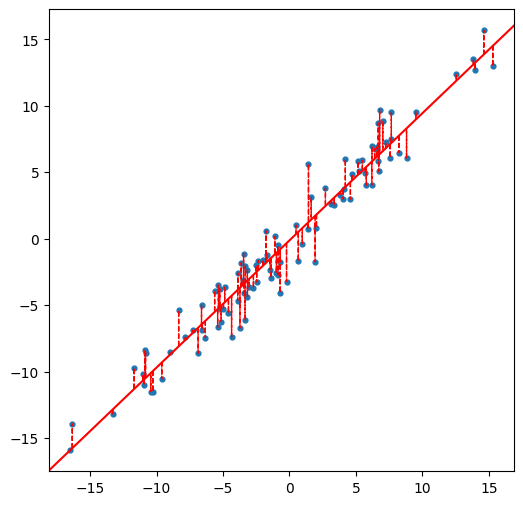

In [ ]:

plt.scatter(points[:,0], points[:,1], s=12)
plt.axline((0, w[1]), slope=w[0], color="red")

resid = points[:,1] - linear_regression(w, points[:,0])
shrink = .2

for i in range(len(points)):
    plt.arrow(points[i, 0], points[i, 1], 0, -resid[i] , fc='r', ec='r',linestyle="--")
plt.show()

In [ ]:
print(w, k)

[ 0.95647715 -0.12874843] 168


**2.** *Using a set of points generate with an angle of 45 degrees, change the value of
one point to a value “far away” from the set of points. Draw the line that approximates the set of points and observe that one point may have a large influence in the obtained solution.*

With the following code we generate one outsider point and find again the fitting line with the new set of points. The figure shown below shows the new line obtained. In this figure we can clearly see that the line is highly influenced by this outsider point, as the line is now tilted towards this point. This difference can also be percieved in the values of $(w_0, w_1)$, which are now $(0.5813, 0.0830)$.

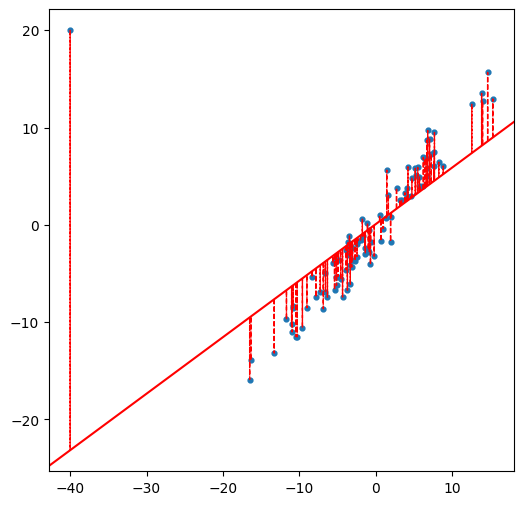

In [ ]:
points[0] = [-40, 20]
Xi = points[:,0]
Yi = points[:,1]
weights = np.array([random.random(), random.random()])

w, k = gradient_descent_backtrack(weights, LR_grad, _loss)

plt.scatter(points[:,0], points[:,1], s=12)
plt.axline((0, w[1]), slope=w[0], color="red")

resid = points[:,1] - linear_regression(w, points[:,0])
shrink = .2

for i in range(len(points)):
    plt.arrow(points[i, 0], points[i, 1], 0, -resid[i] , fc='r', ec='r',linestyle="--")
plt.show()

In [ ]:
print(w, k)

[0.58131554 0.08299919] 326


# 2. Robust functions

In the previous section we have been considering the LSM error function, which is known to be sensible to outliners. In this section we will consider more robust error functions. In particular we will use the Cauchy function, which is given by:

$$
\rho = \frac{c^2}{2} log\left[1 + \left(\frac{u}{c}\right)^2\right]
$$

We are going to adapt this function to the fitting line defined by $w_0, w_1$. The resulting error function for finding the fitting line with the Cauchy function is given by:

$$
Q = \sum_{i=1}^{n} \frac{c^2}{2} log\left[1 + \left(\frac{w_0 x_i + w_1 - y_i}{c}\right)^2\right]
$$

We will apply the gradient descent method to find the parameters $w_0, w_1$. To do so we compute the gradient of the function which is given by:

$$
\frac{\partial Q}{\partial w_0} = \sum_{i=1}^m \frac{(w_0 x_i + w_i - y_i)x_i}
{\left(1 + \left(\frac{w_0 x_i + w_i - y_i}{c}\right)^2\right) ln(10)}
$$

$$
\frac{\partial Q}{\partial w_1} = \sum_{i=1}^m \frac{w_0 x_i + w_i - y_i}
{\left(1 + \left(\frac{w_0 x_i + w_i - y_i}{c}\right)^2\right) ln(10)}
$$

$$
\nabla Q = \left(\frac{\partial Q}{\partial w_0}, \frac{\partial Q}{\partial w_1}\right)
$$

**1.** *Plot the least squares function, and compare it with the Cauchy function.*

With the code shown below we plot both the least squares and Cauchy function. It can be seen that the least squares will produce a larger error as the distance increases from the 0. On the opposite, the Cauchy function is steeper near the 0 while producing a lower error as we get far from the 0.

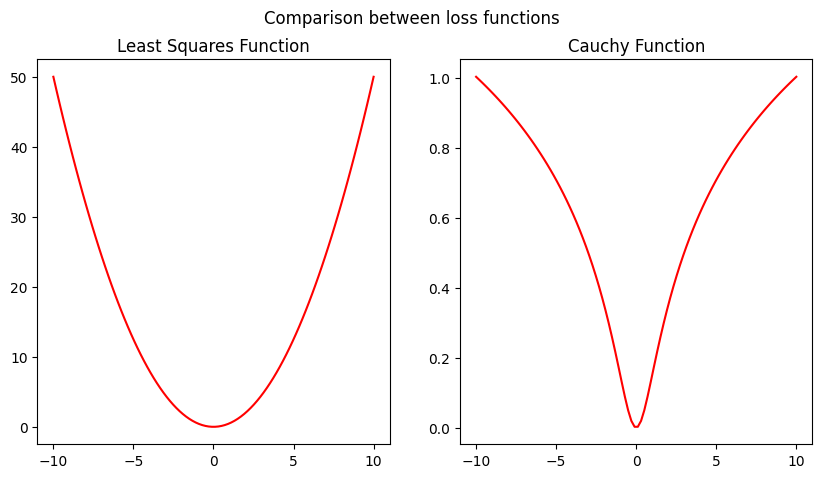

In [ ]:
x = np.linspace(-10, 10, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10,5])
fig.suptitle('Comparison between loss functions')
ax1.plot(x, (1/2)*x*x, color='red')
ax1.set_title("Least Squares Function")
ax2.plot(x, (1/2)*np.log10(1+x*x), color='red')
ax2.set_title("Cauchy Function")
plt.show()

**2.** *Implement the algorithm that allows to compute the parameters $w_0$ and $w_1$ using the Cauchy function. For that issue you can use the backtracking gradient descent method.*

In the following lines we define the Cauchy function along with the gradient and loss function. By now we will consider $c=1$. With this function we can use the previously defined gradient descent method to obtaind the values for $w_0, w_1$.

In [ ]:
c_param = 1

def cauchy_function(y, yhat):
  return ((c_param**2)/2)*np.sum(np.log10(1+((yhat-y)/c_param)**2))

def linear_regression(w, x):
  return w[0] * x + w[1]

def _loss_cauchy(w0, w1):
  return cauchy_function(Yi, linear_regression(np.array([w0, w1]), Xi))

def cauchy_grad(w0, w1):
  num = (w0*Xi + w1 - Yi)
  denom = (1+((w0*Xi+w1-Yi)/c_param)**2)*np.log(10)
  dw0 = np.sum(num*Xi/denom)
  dw1 = np.sum(num/denom)
  return np.array([dw0, dw1])

**3.** *Compare the results obtained with the least squares function and with the Cauchy function,
assuming that there are no outliers in the dataset.*

With the next lines of code, we generate both solutions for the least squares and Cauchy function. In the figure we plot below, the fitting line obtained by both methods is presented. As it can be seen, the lines obtained are almost identical. Since there are no outliers, both functions penalize in a similar way the distance from the points to the line and hence, the resulting lines are similar.

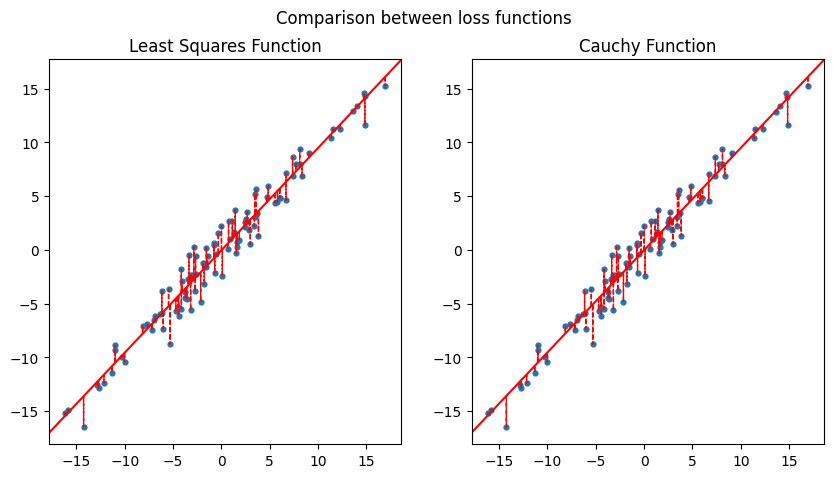

In [ ]:
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)

Xi = points[:,0]
Yi = points[:,1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10,5])
fig.suptitle('Comparison between loss functions')

weights = np.array([random.random(), random.random()])

w, k = gradient_descent_backtrack(weights, LR_grad, _loss)

ax1.set_title("Least Squares Function")
ax1.scatter(points[:,0], points[:,1], s=12)
ax1.axline((0, w[1]), slope=w[0], color="red")

resid = points[:,1] - linear_regression(w, points[:,0])
shrink = .2

for i in range(len(points)):
    ax1.arrow(points[i, 0], points[i, 1], 0, -resid[i] , fc='r', ec='r',linestyle="--")

w, k = gradient_descent_backtrack(weights, cauchy_grad, _loss_cauchy)

ax2.set_title("Cauchy Function")
ax2.scatter(points[:,0], points[:,1], s=12)
ax2.axline((0, w[1]), slope=w[0], color="red")

resid = points[:,1] - linear_regression(w, points[:,0])
shrink = .2

for i in range(len(points)):
    ax2.arrow(points[i, 0], points[i, 1], 0, -resid[i] , fc='r', ec='r',linestyle="--")

plt.show()


**4.** *Compare now the results with only one outlier. You may proceed as previously proposed. The
Cauchy function should be more robust than the quadratic function.*

To compare the behaviour of both error functions, we have added one outlier to our set of points. In the figure below, we show a comparison of the fitted line obtained with least squares (left) and the fitting line obtained with the Cauchy function (right). As expected, we can clearly see how the outlier influences the least squares function and tilts the fitting line towards its value. On the other hand, we can see that the Cauchy function is less affected by the presence of this outlier. We can see that the fitting line obtained with the Cauchy function is closer to the previous one without outlier, which shows that the function is indeed, more robust to outliners.
This is an expected behaviour as the Cauchy function doesn't penalize as much (compared to LSM) points that are really far from zero, as it was shown in the previous exercise, hence, reducing the influence that the outliner can have in the error function.

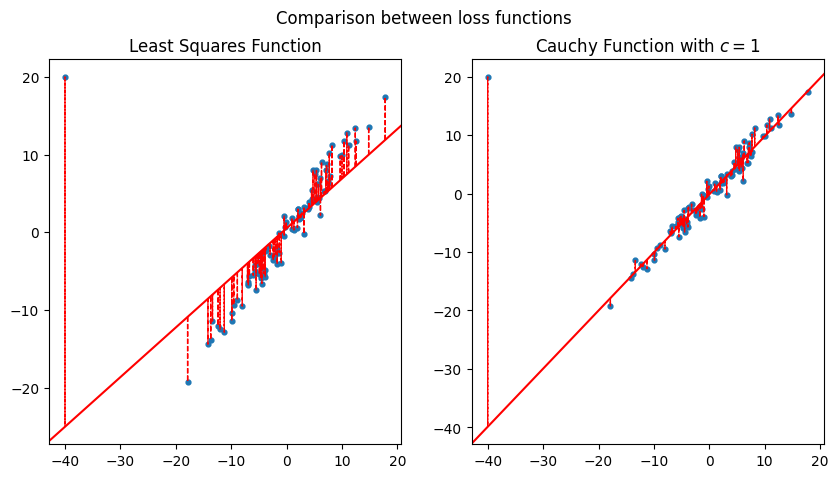

In [ ]:
c_param = 1
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)

points[0] = [-40, 20]
Xi = points[:,0]
Yi = points[:,1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10,5])
fig.suptitle('Comparison between loss functions')

weights = np.array([random.random(), random.random()])

w, k = gradient_descent_backtrack(weights, LR_grad, _loss)

ax1.set_title("Least Squares Function")
ax1.scatter(points[:,0], points[:,1], s=12)
ax1.axline((0, w[1]), slope=w[0], color="red")

resid = points[:,1] - linear_regression(w, points[:,0])
shrink = .2

for i in range(len(points)):
    ax1.arrow(points[i, 0], points[i, 1], 0, -resid[i] , fc='r', ec='r',linestyle="--")

w, k = gradient_descent_backtrack(weights, cauchy_grad, _loss_cauchy)

ax2.set_title(f"Cauchy Function with $c = {c_param}$")
ax2.scatter(points[:,0], points[:,1], s=12)
ax2.axline((0, w[1]), slope=w[0], color="red")

resid = points[:,1] - linear_regression(w, points[:,0])
shrink = .2

for i in range(len(points)):
    ax2.arrow(points[i, 0], points[i, 1], 0, -resid[i] , fc='r', ec='r',linestyle="--")

plt.show()

**5.** *Test the influence of the parameter c in the parameters obtained. You may, for instance, check the results obtained with c = 1, c = 100, c = 1/100 and c = 1/1000.*

With the next code, we compute the fitting lines with the values of $c$ given. For each value, we plot the Cauchy function, the fitting line obtained with the value of $c$ and the histogram of $\rho(u)$, that shows the distributions of the error from the points to the line. For each $c$ we also include the least squares solution as a comparison.

First, we can see that, as we decrease the value of $c$, the Cauchy function becomes more tight near the zero, and increases more sharply when we move away from the zero. Similarly, the Cauchy functions with larger values of $c$ give in general larger values as we move away from the zero, which means that, the higher the $c$, the higher the error that will be given to points "away" from the fitted line.

If we look now at both the Cauchy function and the histogram, we can notice that when the value of $u$ steps outside the quadratic zone the Cauchy function (for $c=1$ it is $u \approx 1$) the points start to behave as outliers. As a consequence, points that are further from this, the outliers are grouped together in the histograms.

Another thing to note is that as more points are considered outliers, the line tilts to fit those points that are considered inliers. A consequence of this is that when we have a bigger value of $c$ such as $100$, the cuadratic zone is bigger, so in this set were the points are sufficiently together enough, the LSM and Cauchy function for $c=100$ perform approximately the same.

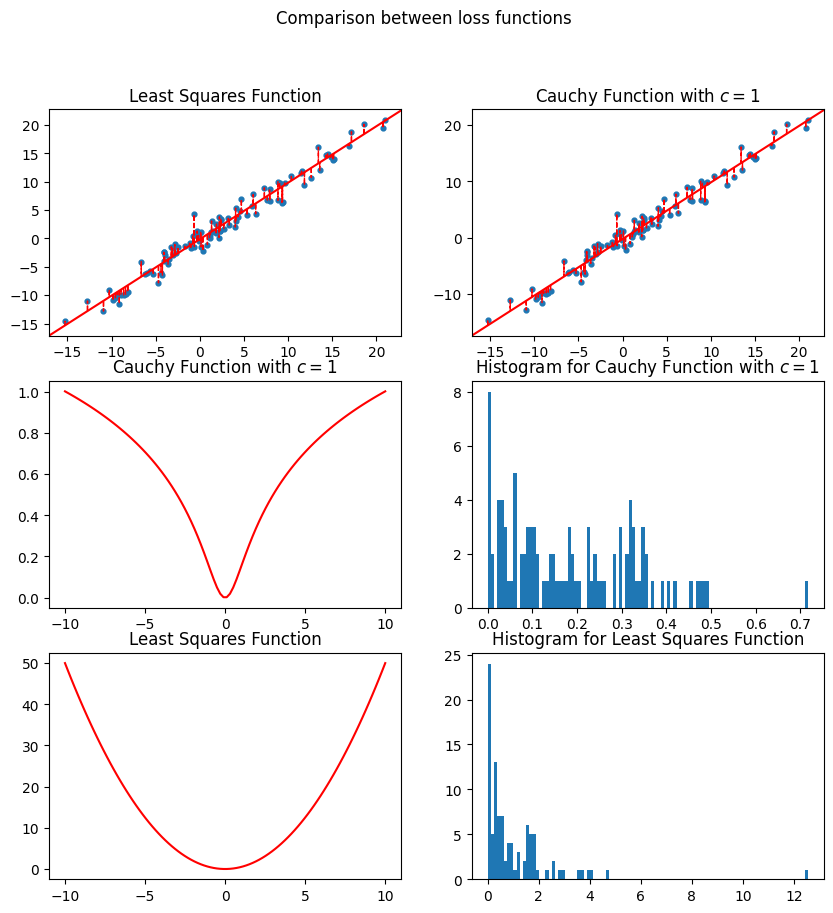

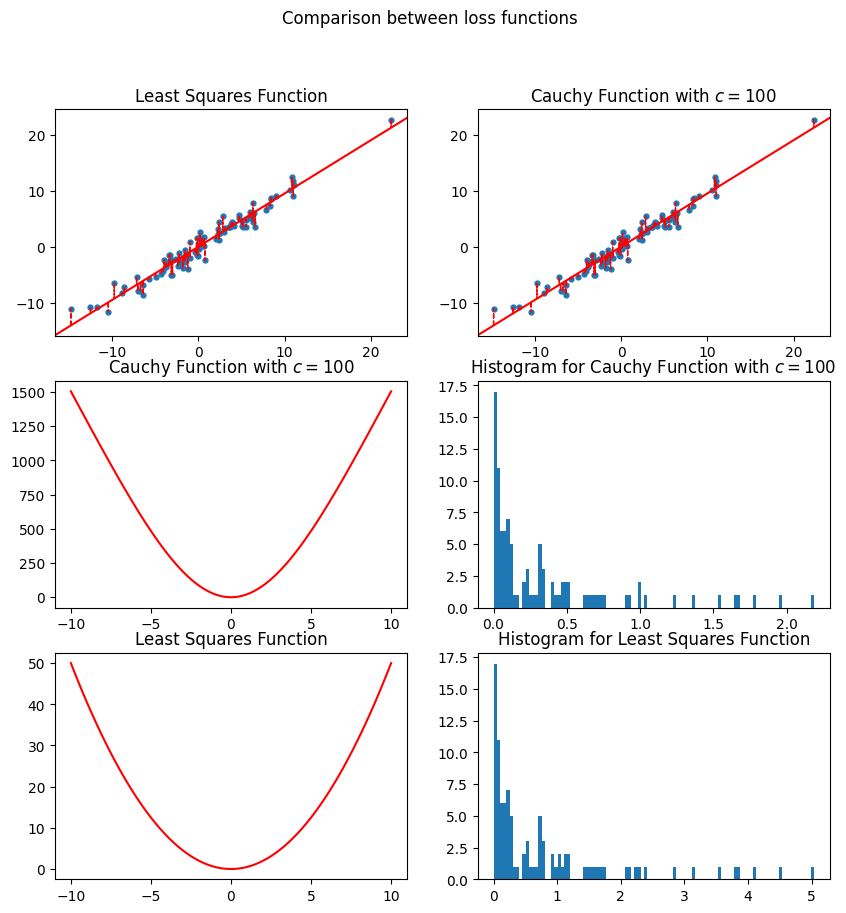

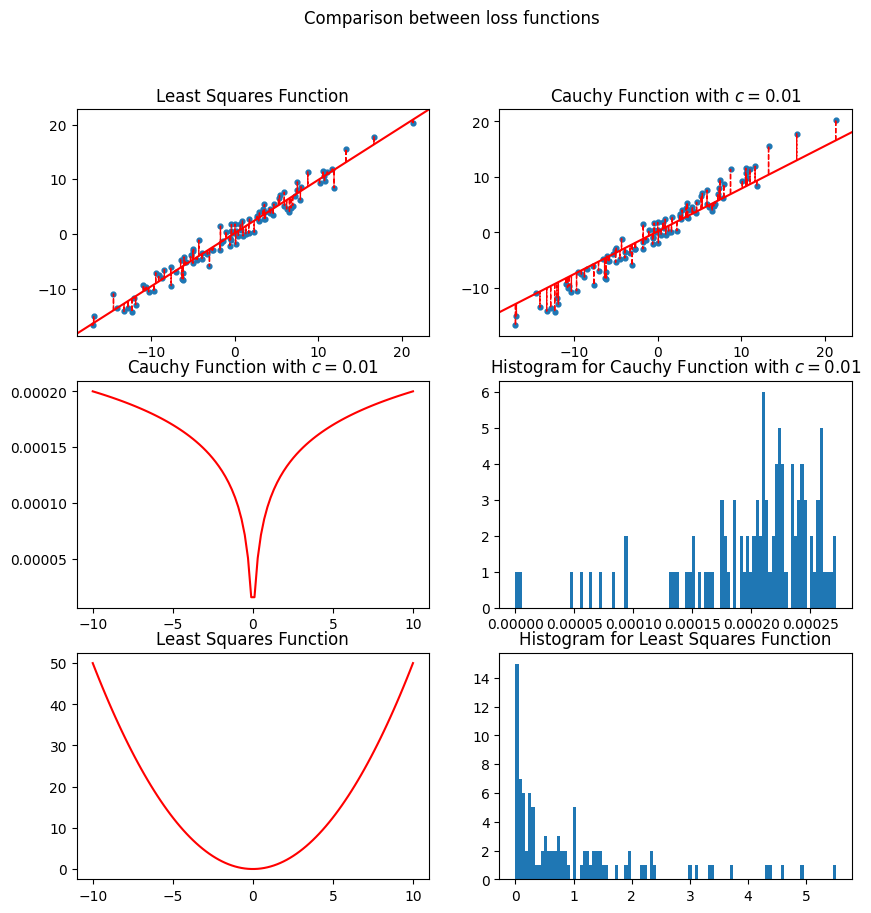

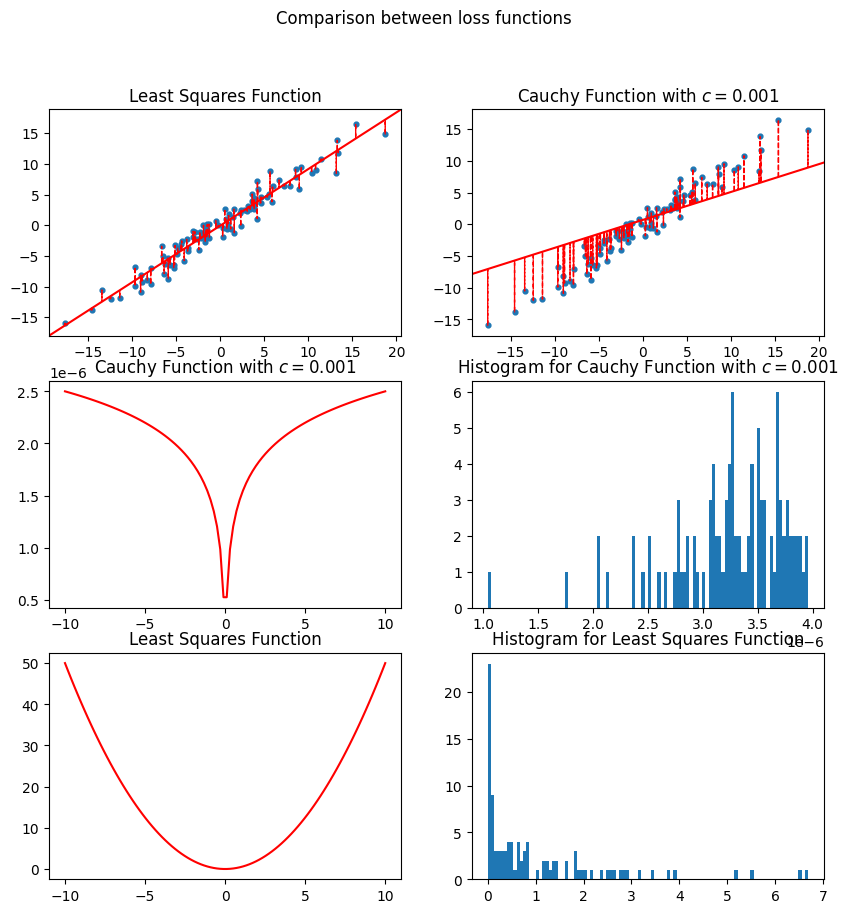

In [ ]:
c_params = [1, 100, 1/100, 1/1000]
for _c in c_params:
  c_param = _c
  m = [0.,0.]
  angle = 45*math.pi/180
  rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
  math.cos(angle)]])
  lamb = np.array([[100,0],[0,1]])
  s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
  points = np.random.multivariate_normal(m,s,100)

  #points[0] = [-40, 20]
  Xi = points[:,0]
  Yi = points[:,1]

  fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=[10,10])
  fig.suptitle('Comparison between loss functions')

  weights = np.array([random.random(), random.random()])

  w_lsm, k = gradient_descent_backtrack(weights, LR_grad, _loss)

  ax1.set_title("Least Squares Function")
  ax1.scatter(points[:,0], points[:,1], s=12)
  ax1.axline((0, w_lsm[1]), slope=w_lsm[0], color="red")

  resid = points[:,1] - linear_regression(w_lsm, points[:,0])
  shrink = .2

  for i in range(len(points)):
      ax1.arrow(points[i, 0], points[i, 1], 0, -resid[i] , fc='r', ec='r',linestyle="--")

  w_cauchy, k = gradient_descent_backtrack(weights, cauchy_grad, _loss_cauchy)

  ax2.set_title(f"Cauchy Function with $c = {c_param}$")
  ax2.scatter(points[:,0], points[:,1], s=12)
  ax2.axline((0, w_cauchy[1]), slope=w_cauchy[0], color="red")

  resid = points[:,1] - linear_regression(w_cauchy, points[:,0])
  shrink = .2

  for i in range(len(points)):
      ax2.arrow(points[i, 0], points[i, 1], 0, -resid[i] , fc='r', ec='r',linestyle="--")

  x = np.linspace(-10, 10, 100)

  ax3.set_title(f"Cauchy Function with $c = {c_param}$")
  ax3.plot(x, ((c_param**2)/2)*np.log10(1+((x*x)/c_param)), color='red')

  hist_cauchy = np.abs(((c_param**2)/2)*np.log10(1+((linear_regression(w_cauchy, Xi)-Yi)/c_param)**2))

  ax4.set_title(f"Histogram for Cauchy Function with $c = {c_param}$")
  ax4.hist(hist_cauchy, bins=100)

  ax5.set_title(f"Least Squares Function")
  ax5.plot(x, (1/2)*x*x, color='red')

  hist_lsm = np.abs((1/2)*(linear_regression(w_lsm, Xi)-Yi)**2)

  ax6.set_title(f"Histogram for Least Squares Function")
  ax6.hist(hist_lsm, bins=100)

  plt.show()

**6.** *Using c = 1 and c = 1/100 you may, as before, gradually introduce more number of outliers into the dataset. You should see that for a certain number of outliers, the the Cauchy function will be sensitive to the “high” number of outliers.*

In the next lines of code, we incrementally include 5 outliers each time to our set of points, until we reach 50 outliners. For each iteration we plot both the fitted line computed using the Cauchy function with $c=1$ and $c=1/100$. Recall that our original set of codes had 100 points.

From the figures below, we can see that, the Cauchy function with $c=1$ is more robust than the one with $c=1/100$. It can be seen that, starting from 20 outliers, the line obtained with $c=1/100$ is clearly influenced by the outliers, while the line obtained with $c=1$ is still unaffected after adding 50 outliners.

This is an expected behaviour, as the Cauchy function with $c=1/100$ is more "restrictive" and considers less points as "inliers", which at the end leads to some "outliers" having more significance for the fitted line than the original ones. On the other hand, the Cuachy function with $c=1$ is able to consider a larger amount of points as "inliers", which at the end, makes it easier to cover all the original points as "inliers".

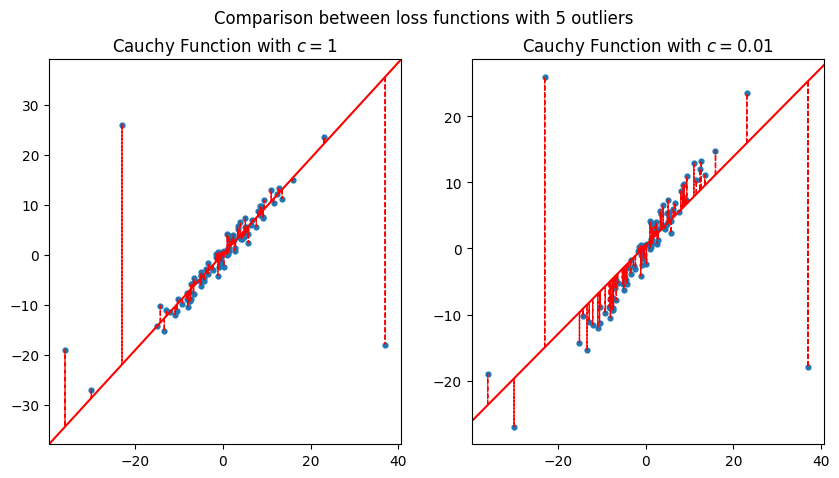

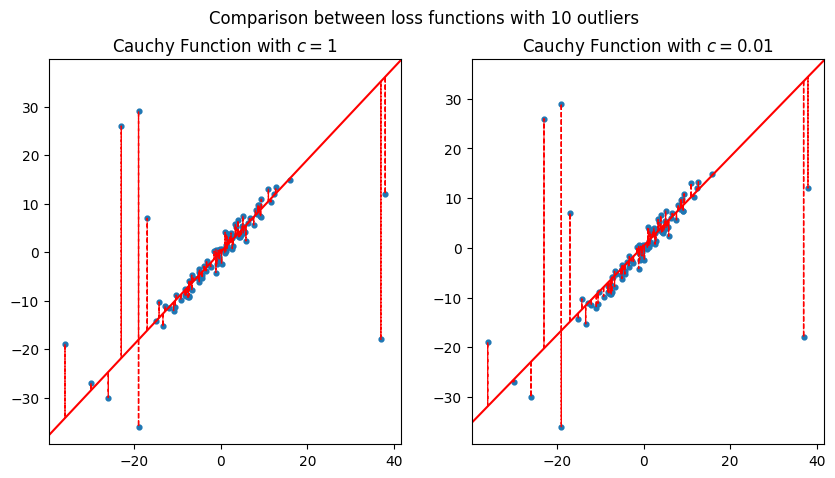

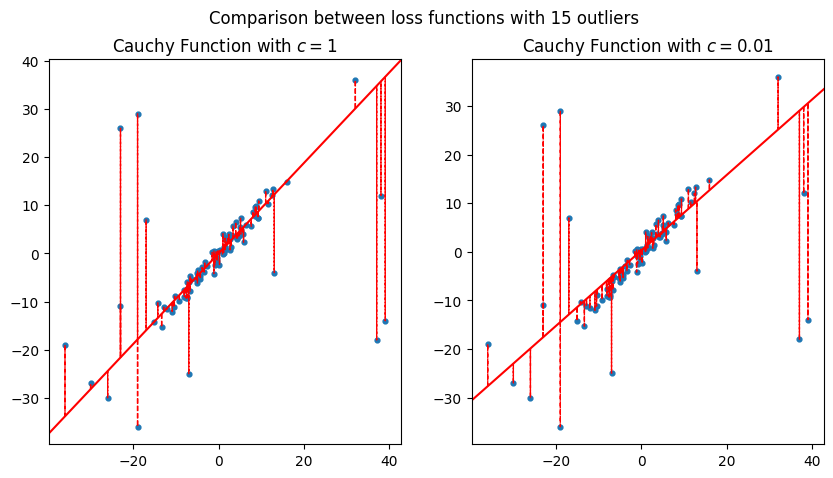

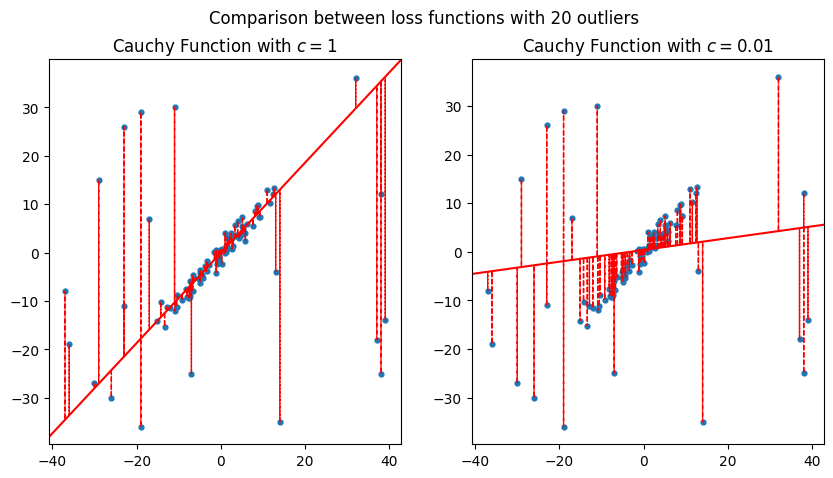

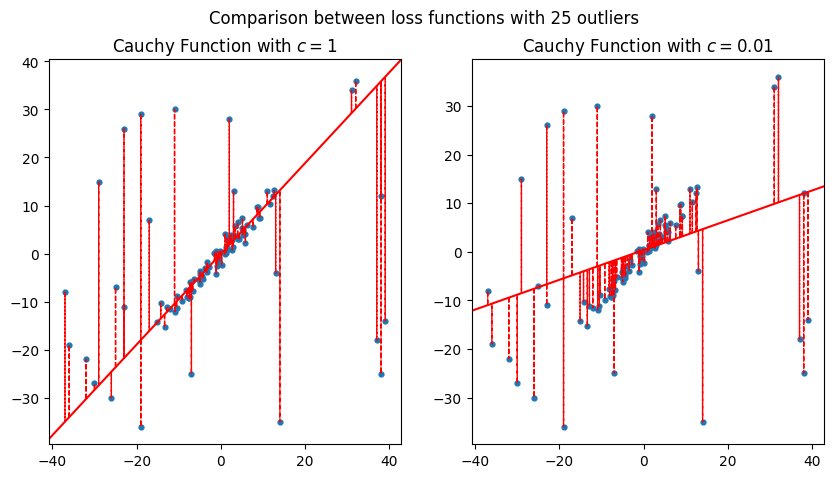

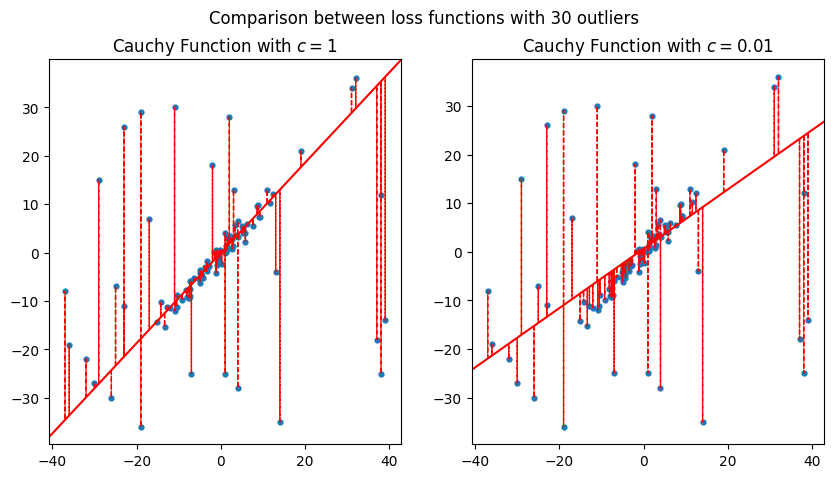

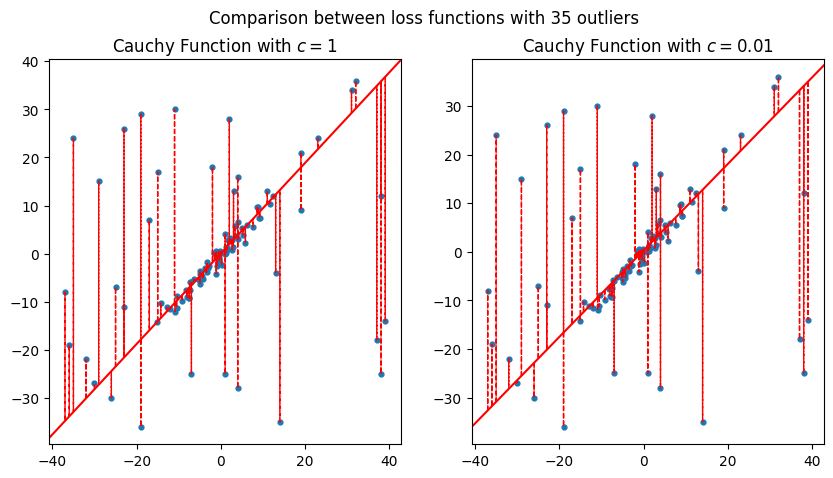

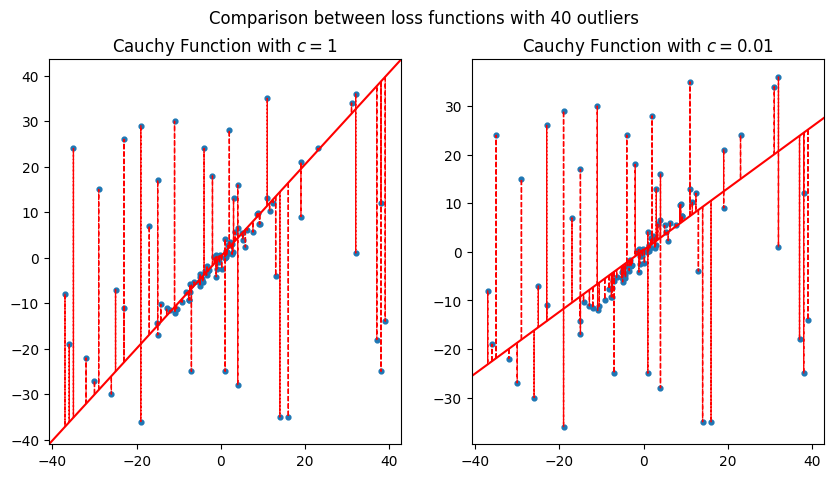

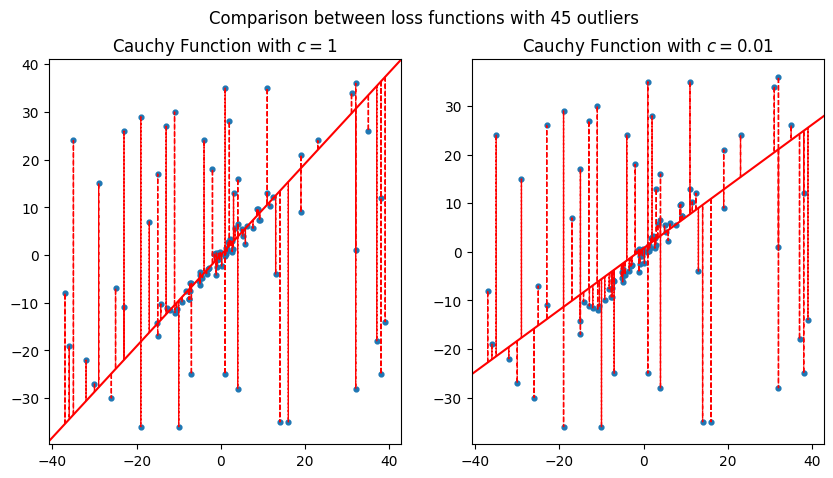

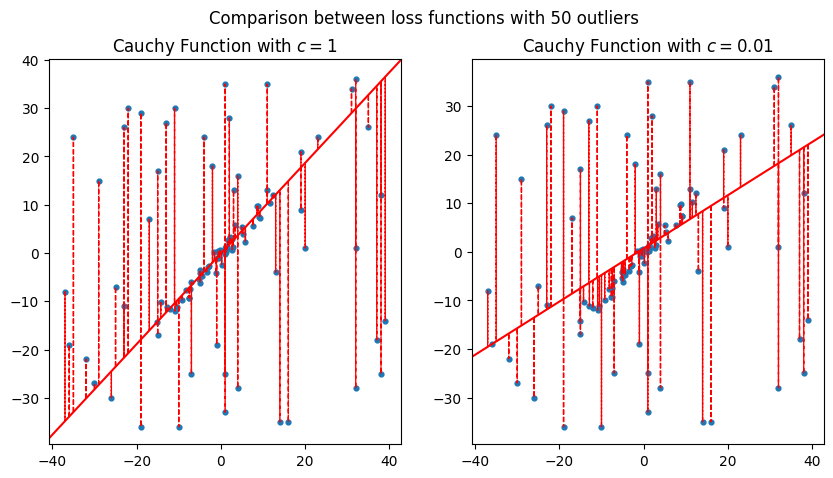

In [ ]:

m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)

for i in range(10):
  for j in range(5):
    points[i*5+j] = [random.randint(-40, 40),random.randint(-40, 40)]
  Xi = points[:,0]
  Yi = points[:,1]

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10,5])
  fig.suptitle(f'Comparison between loss functions with {(i+1)*5} outliers')

  weights = np.array([random.random(), random.random()])

  c_param = 1
  w_cauchy, k = gradient_descent_backtrack(weights, cauchy_grad, _loss_cauchy)

  ax1.set_title(f"Cauchy Function with $c = {c_param}$")
  ax1.scatter(points[:,0], points[:,1], s=12)
  ax1.axline((0, w_cauchy[1]), slope=w_cauchy[0], color="red")

  resid = points[:,1] - linear_regression(w_cauchy, points[:,0])
  shrink = .2

  for i in range(len(points)):
      ax1.arrow(points[i, 0], points[i, 1], 0, -resid[i] , fc='r', ec='r',linestyle="--")

  c_param = 1/100
  w_cauchy, k = gradient_descent_backtrack(weights, cauchy_grad, _loss_cauchy)

  ax2.set_title(f"Cauchy Function with $c = {c_param}$")
  ax2.scatter(points[:,0], points[:,1], s=12)
  ax2.axline((0, w_cauchy[1]), slope=w_cauchy[0], color="red")

  resid = points[:,1] - linear_regression(w_cauchy, points[:,0])
  shrink = .2

  for i in range(len(points)):
      ax2.arrow(points[i, 0], points[i, 1], 0, -resid[i] , fc='r', ec='r',linestyle="--")

  plt.show()